In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
judges=pd.read_csv('C:\\Users\\Administrator\\Project\\csv\\judges_clean.csv')

In [20]:
judges.head(2)

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014


In [3]:
judges['judges_count']=1
df = pd.DataFrame((judges.groupby(['state_code']).count())["judges_count"])
df['index1'] = df.index
df.head(3)

,judges_count,index1
state_code,,
1,22440,1
2,3508,2
3,6815,3


In [25]:
key=pd.read_csv('C:\\Users\\Administrator\\Project\\csv\\keys\\cases_court_key.csv')
d={}
for i in range(len(key)):
    if(key.loc[i, "state_code"] not in d.keys()):
        d[key.loc[i, "state_code"]]=key.loc[i, "state_name"]

for i in range(1, len(df)):
    if(i!=28):
        df.loc[i, "state_name"] = d[df.loc[i, "index1"]]
        
for i in range(29, 31):
    df.loc[i, "state_name"] = d[df.loc[i, "index1"]]
df.head(34)

,judges_count,index1,state_name
state_code,,,
1,22440,1,Maharashtra
2,3508,2,Andhra Pradesh
3,6815,3,Karnataka
4,3107,4,Kerala
5,915,5,Himachal Pradesh
6,1578,6,Assam
7,2285,7,Jharkhand
8,4124,8,Bihar
9,5433,9,Rajasthan


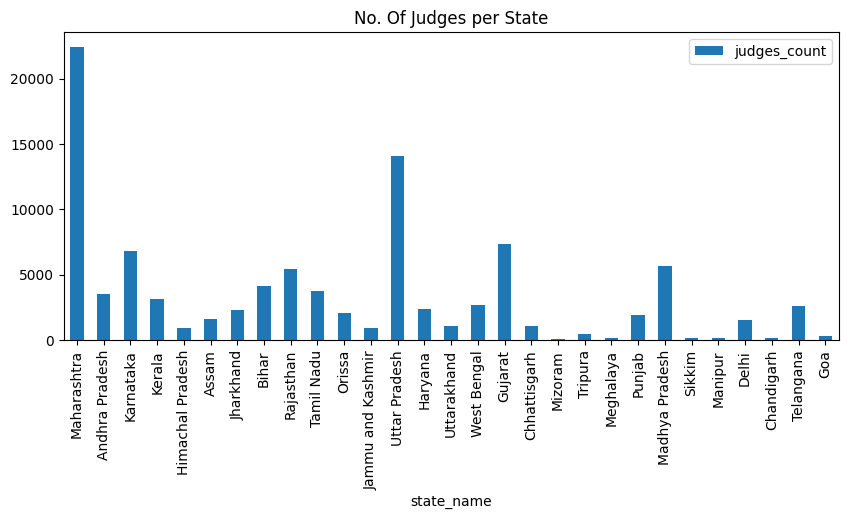

In [5]:
df.plot(x = "state_name", y = "judges_count", kind = "bar", figsize=(10, 4), legend=True)
plt.title("No. Of Judges per State")
plt.show()

In [6]:
cases=pd.read_csv('C:\\Users\\Administrator\\Project\\csv\\cases\\cases_2018.csv')

In [8]:
cases.head(3)
cases['count']=1
df2 = pd.DataFrame((cases.groupby(['state_code']).count())["count"])
df2['index2'] = df2.index

In [9]:
for i in range(1, len(df2)):
    if(i!=28):
        df2.loc[i, "state_name"] = d[df2.loc[i, "index2"]]
for i in range(32, 34):
    df2.loc[i, "state_name"] = d[df2.loc[i, "index2"]]

In [10]:
df2.head(2)

,count,index2,state_name
state_code,,,
1,1374670,1,Maharashtra
2,317917,2,Andhra Pradesh


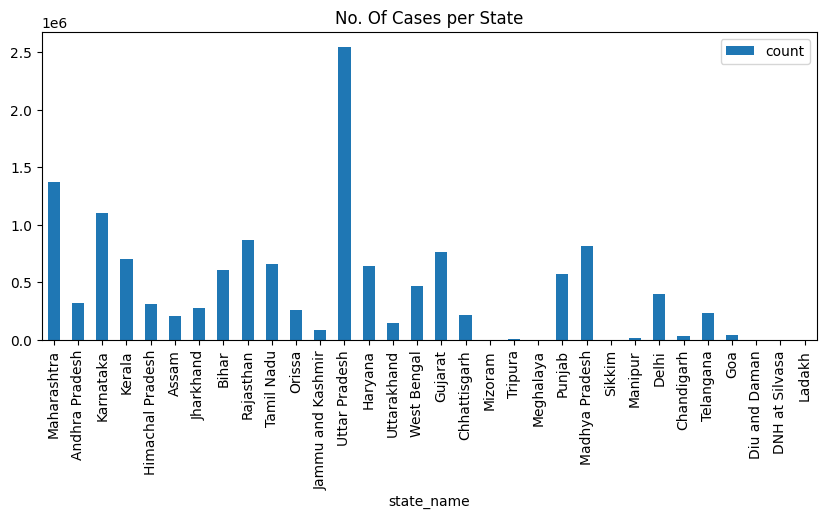

In [11]:
df2.plot(x = "state_name", y = "count", kind = "bar", figsize=(10, 4), legend=True)
plt.title("No. Of Cases per State")
plt.show()

In [12]:
df3 = df.merge(df2, on="state_name", how = 'left')
df3.head(4)

,judges_count,index1,state_name,count,index2
0,22440,1,Maharashtra,1374670,1
1,3508,2,Andhra Pradesh,317917,2
2,6815,3,Karnataka,1101515,3
3,3107,4,Kerala,705613,4


In [14]:
for i in range(len(df3)):
        df3.loc[i, "cases_perJudge"] = (df3.loc[i, "count"])/(df3.loc[i, "judges_count"]) 
df3.head(2)

,judges_count,index1,state_name,count,index2,cases_perJudge
0,22440,1,Maharashtra,1374670,1,61.259804
1,3508,2,Andhra Pradesh,317917,2,90.626283


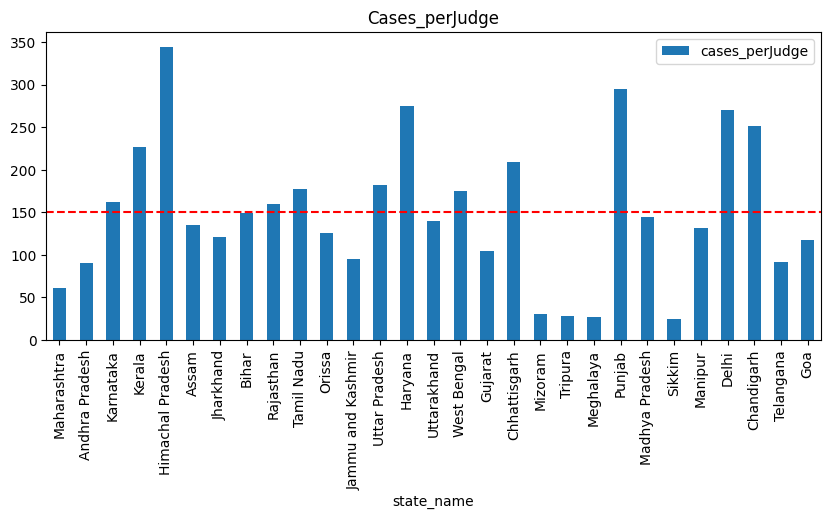

In [15]:
threshold=df3["cases_perJudge"].mean()
df3.plot(x = "state_name", y = "new_cases_perJudge_2018", kind = "bar", figsize=(10, 4), legend=True)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title("Cases_perJudge")
plt.show()